In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.mixture import GaussianMixture

In [53]:
def gen_data(k=3, dim=2, points_per_cluster=2000, lim=[-10, 10]):
    x = []
    mean = np.random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    print(mean)
    for i in range(k):
        cov = np.random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        print(cov)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True)
    return x

[[-4.4475463   5.76864611]
 [-8.65555947 -5.31545736]
 [-1.56133515 -3.12949631]]
[[3.83419107 2.67661465]
 [2.67661465 3.45960137]]
[[4.85176183 4.19648794]
 [4.19648794 5.87439213]]
[[4.96937976 3.18343722]
 [3.18343722 4.21235916]]


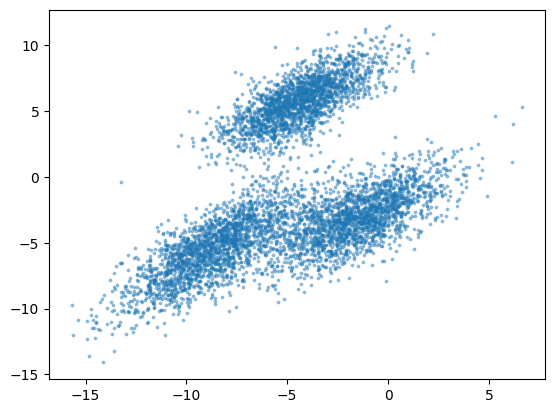

In [54]:
data = gen_data()

In [55]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(n_components=3)

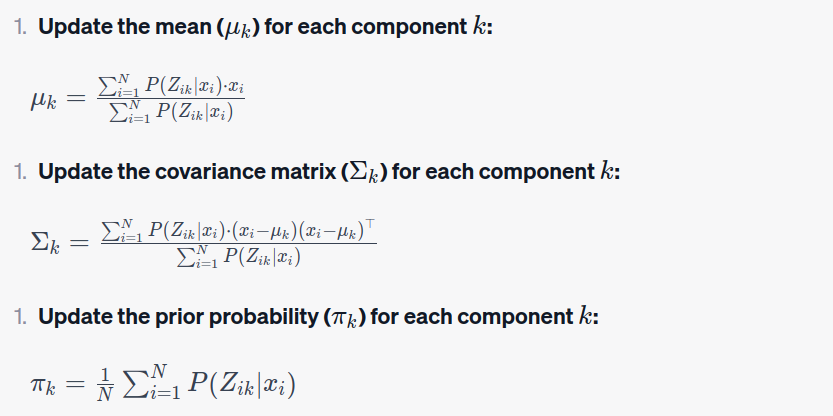

/tmp/ipykernel_35110/2160954155.py:8: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180 + angle, color='r', alpha=0.3)


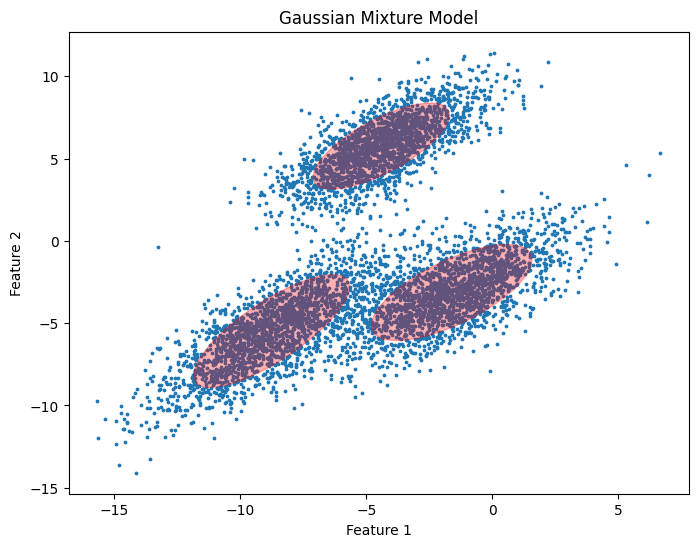

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1],s=3)
for covar, mean in zip(gmm.covariances_, gmm.means_):
    v, w = np.linalg.eigh(covar)
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180 + angle, color='r', alpha=0.3)
    plt.gca().add_patch(ell)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.show()
# c=gmm.predict(data),